# Predict The Flight Ticket Price 

In [46]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


In [47]:
#Load dataset
df_train_flight=pd.read_excel("Data_Train.xlsx",parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])
df_test_flight=pd.read_excel("Test_set.xlsx",parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])
#create column dataset to categorise train test dataset after merging
df_train_flight["dataset"]="train"
df_test_flight["dataset"]="test"

In [48]:
#basic insights
df_train_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null datetime64[ns]
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null datetime64[ns]
Arrival_Time       10683 non-null datetime64[ns]
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dataset            10683 non-null object
dtypes: datetime64[ns](3), int64(1), object(8)
memory usage: 1001.6+ KB


In [49]:
#basic insights
df_test_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null datetime64[ns]
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null datetime64[ns]
Arrival_Time       2671 non-null datetime64[ns]
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dataset            2671 non-null object
dtypes: datetime64[ns](3), object(8)
memory usage: 229.6+ KB


In [50]:
#check shape of train and test datasets before merging
df_train_flight.shape,df_test_flight.shape

((10683, 12), (2671, 11))

In [51]:
#Merging the datasets
df_flight=pd.concat([df_train_flight,df_test_flight],ignore_index=True)
df_flight

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,dataset
0,No info,IndiGo,2020-03-22 01:10:00,2019-03-24,2020-11-04 22:20:00,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,train
1,No info,Air India,2020-11-04 13:15:00,2019-01-05,2020-11-04 05:50:00,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,train
2,No info,Jet Airways,2020-06-10 04:25:00,2019-09-06,2020-11-04 09:25:00,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,train
3,No info,IndiGo,2020-11-04 23:30:00,2019-12-05,2020-11-04 18:05:00,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,train
4,No info,IndiGo,2020-11-04 21:35:00,2019-01-03,2020-11-04 16:50:00,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,train
5,No info,SpiceJet,2020-11-04 11:25:00,2019-06-24,2020-11-04 09:00:00,Banglore,2h 25m,3873.0,CCU → BLR,Kolkata,non-stop,train
6,In-flight meal not included,Jet Airways,2020-03-13 10:25:00,2019-12-03,2020-11-04 18:55:00,New Delhi,15h 30m,11087.0,BLR → BOM → DEL,Banglore,1 stop,train
7,No info,Jet Airways,2020-03-02 05:05:00,2019-01-03,2020-11-04 08:00:00,New Delhi,21h 5m,22270.0,BLR → BOM → DEL,Banglore,1 stop,train
8,In-flight meal not included,Jet Airways,2020-03-13 10:25:00,2019-12-03,2020-11-04 08:55:00,New Delhi,25h 30m,11087.0,BLR → BOM → DEL,Banglore,1 stop,train
9,No info,Multiple carriers,2020-11-04 19:15:00,2019-05-27,2020-11-04 11:25:00,Cochin,7h 50m,8625.0,DEL → BOM → COK,Delhi,1 stop,train


In [52]:
#Lets chcek the null values in the dataset
df_flight.isnull().sum()
#There are no null values only Price has 2671 null values which are part of test dataset so no need to worry

Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 1
Source                0
Total_Stops           1
dataset               0
dtype: int64

In [53]:
#Lets chcek the datatypes of the columns
df_flight.dtypes

Additional_Info            object
Airline                    object
Arrival_Time       datetime64[ns]
Date_of_Journey    datetime64[ns]
Dep_Time           datetime64[ns]
Destination                object
Duration                   object
Price                     float64
Route                      object
Source                     object
Total_Stops                object
dataset                    object
dtype: object

In [54]:
#Above "Duration" is of object datatype which we will convert into hours as float dataype
x=(df_flight["Arrival_Time"]-df_flight["Dep_Time"])
duration_list=list()
for i in range(len(x)):
    dur=x.iloc[i].seconds/3600
    duration_list.append(dur)
df_flight["Duration"]=duration_list

In [55]:
#Lets again chcek the data
df_flight

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,dataset
0,No info,IndiGo,2020-03-22 01:10:00,2019-03-24,2020-11-04 22:20:00,New Delhi,2,3897.0,BLR → DEL,Banglore,non-stop,train
1,No info,Air India,2020-11-04 13:15:00,2019-01-05,2020-11-04 05:50:00,Banglore,7,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,train
2,No info,Jet Airways,2020-06-10 04:25:00,2019-09-06,2020-11-04 09:25:00,Cochin,19,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,train
3,No info,IndiGo,2020-11-04 23:30:00,2019-12-05,2020-11-04 18:05:00,Banglore,5,6218.0,CCU → NAG → BLR,Kolkata,1 stop,train
4,No info,IndiGo,2020-11-04 21:35:00,2019-01-03,2020-11-04 16:50:00,New Delhi,4,13302.0,BLR → NAG → DEL,Banglore,1 stop,train
5,No info,SpiceJet,2020-11-04 11:25:00,2019-06-24,2020-11-04 09:00:00,Banglore,2,3873.0,CCU → BLR,Kolkata,non-stop,train
6,In-flight meal not included,Jet Airways,2020-03-13 10:25:00,2019-12-03,2020-11-04 18:55:00,New Delhi,15,11087.0,BLR → BOM → DEL,Banglore,1 stop,train
7,No info,Jet Airways,2020-03-02 05:05:00,2019-01-03,2020-11-04 08:00:00,New Delhi,21,22270.0,BLR → BOM → DEL,Banglore,1 stop,train
8,In-flight meal not included,Jet Airways,2020-03-13 10:25:00,2019-12-03,2020-11-04 08:55:00,New Delhi,1,11087.0,BLR → BOM → DEL,Banglore,1 stop,train
9,No info,Multiple carriers,2020-11-04 19:15:00,2019-05-27,2020-11-04 11:25:00,Cochin,7,8625.0,DEL → BOM → COK,Delhi,1 stop,train


In [56]:
#Lets chcek the value counts of each column of object datatype
for col in df_flight.columns:
    if df_flight[col].dtype=="object":
        print(df_flight[col].value_counts())
        print()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
2 Long layover                      1
Red-eye flight                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64
()
Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64
()
Cochin       5682
Banglore     3581
Delhi     

In [57]:
#need to exract features from dep_time
df_flight["time_of_day"]=np.where((df_flight["Dep_Time"].dt.hour>=0)&(df_flight["Dep_Time"].dt.hour<=2),"Late Night",
                         np.where((df_flight["Dep_Time"].dt.hour>=3)&(df_flight["Dep_Time"].dt.hour<=7),"Early Morning",
                         np.where((df_flight["Dep_Time"].dt.hour>=8)&(df_flight["Dep_Time"].dt.hour<=11),"Morning",
                         np.where((df_flight["Dep_Time"].dt.hour>=12)&(df_flight["Dep_Time"].dt.hour<=16),"Afternoon",
                         np.where((df_flight["Dep_Time"].dt.hour>=17)&(df_flight["Dep_Time"].dt.hour<=19),"Evening",
                         "Night")))))

In [58]:
#Convert No Info in No info because both are same
df_flight["Additional_Info"] = df_flight["Additional_Info"].replace({'No Info': 'No info'})

In [59]:
df_flight

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,dataset,time_of_day
0,No info,IndiGo,2020-03-22 01:10:00,2019-03-24,2020-11-04 22:20:00,New Delhi,2,3897.0,BLR → DEL,Banglore,non-stop,train,Night
1,No info,Air India,2020-11-04 13:15:00,2019-01-05,2020-11-04 05:50:00,Banglore,7,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,train,Early Morning
2,No info,Jet Airways,2020-06-10 04:25:00,2019-09-06,2020-11-04 09:25:00,Cochin,19,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,train,Morning
3,No info,IndiGo,2020-11-04 23:30:00,2019-12-05,2020-11-04 18:05:00,Banglore,5,6218.0,CCU → NAG → BLR,Kolkata,1 stop,train,Evening
4,No info,IndiGo,2020-11-04 21:35:00,2019-01-03,2020-11-04 16:50:00,New Delhi,4,13302.0,BLR → NAG → DEL,Banglore,1 stop,train,Afternoon
5,No info,SpiceJet,2020-11-04 11:25:00,2019-06-24,2020-11-04 09:00:00,Banglore,2,3873.0,CCU → BLR,Kolkata,non-stop,train,Morning
6,In-flight meal not included,Jet Airways,2020-03-13 10:25:00,2019-12-03,2020-11-04 18:55:00,New Delhi,15,11087.0,BLR → BOM → DEL,Banglore,1 stop,train,Evening
7,No info,Jet Airways,2020-03-02 05:05:00,2019-01-03,2020-11-04 08:00:00,New Delhi,21,22270.0,BLR → BOM → DEL,Banglore,1 stop,train,Morning
8,In-flight meal not included,Jet Airways,2020-03-13 10:25:00,2019-12-03,2020-11-04 08:55:00,New Delhi,1,11087.0,BLR → BOM → DEL,Banglore,1 stop,train,Morning
9,No info,Multiple carriers,2020-11-04 19:15:00,2019-05-27,2020-11-04 11:25:00,Cochin,7,8625.0,DEL → BOM → COK,Delhi,1 stop,train,Morning


In [61]:
#Lets do EDA

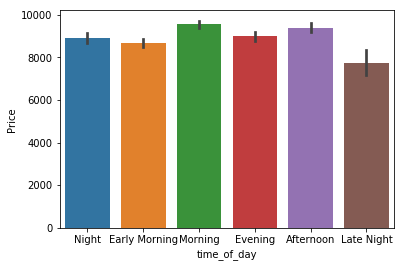

In [62]:
#lets check price variation of flight tickts wrt time of day
sns.barplot(x="time_of_day",y="Price",data=df_flight)
plt.show()

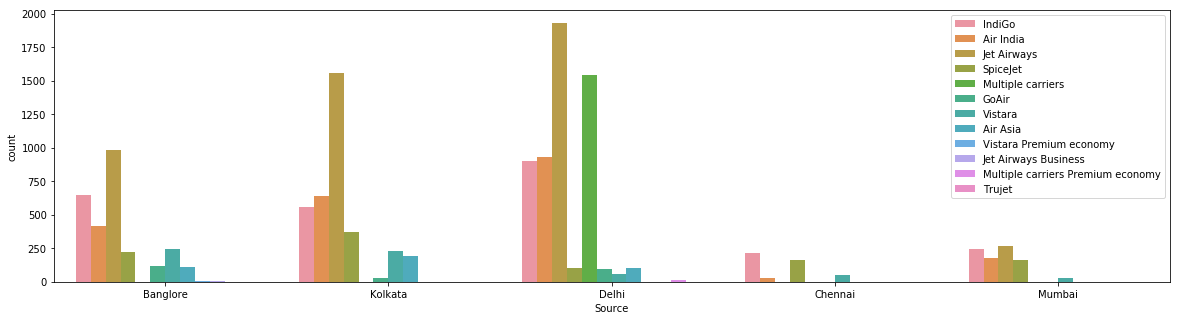

In [63]:
#Lets chcek the most popular flight region wise
plt.figure(figsize=(20,5))
sns.countplot(x="Source",hue="Airline",data=df_flight)
plt.legend( loc=1)
plt.show()

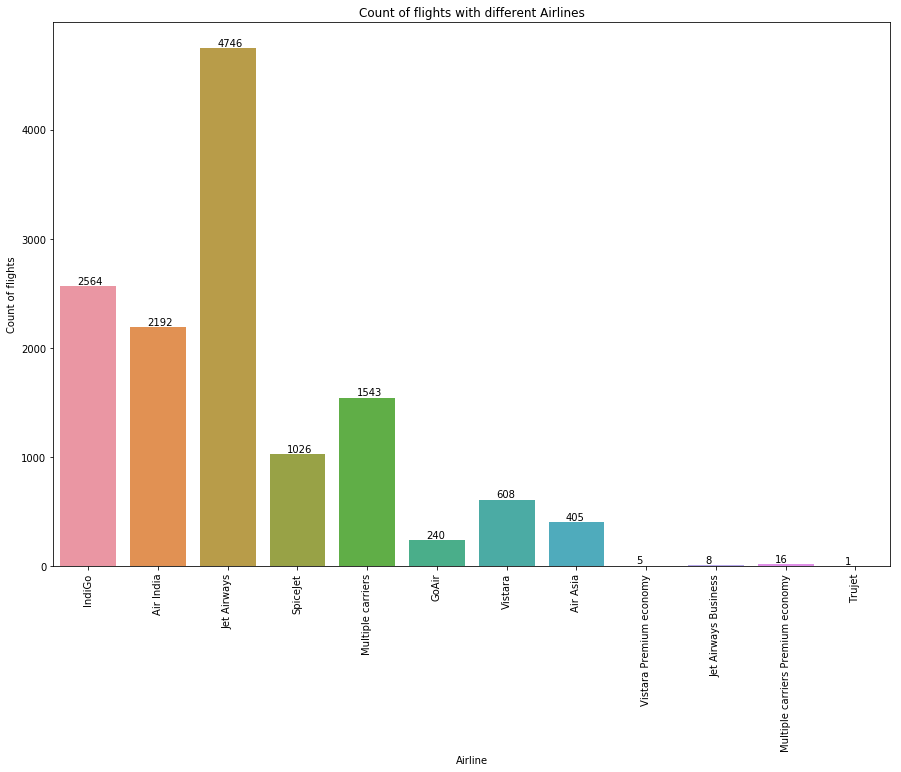

In [64]:
#count of flights wrt airlines
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df_flight)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

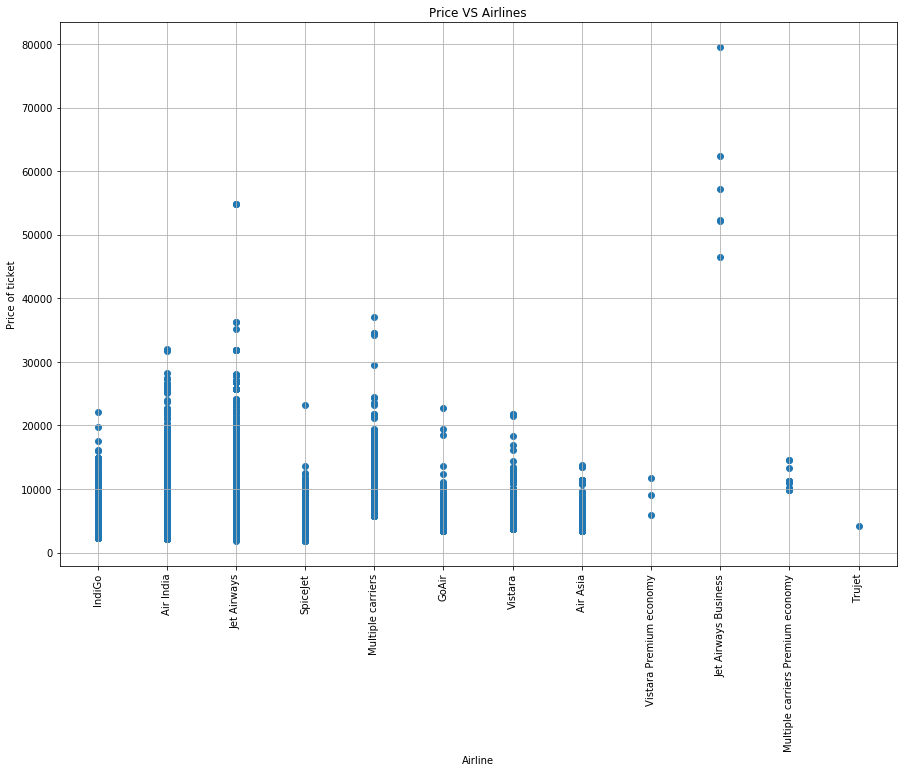

In [65]:
#price variation comparision of varios airlines 
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(df_flight['Airline'], df_flight['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)
plt.grid(True)


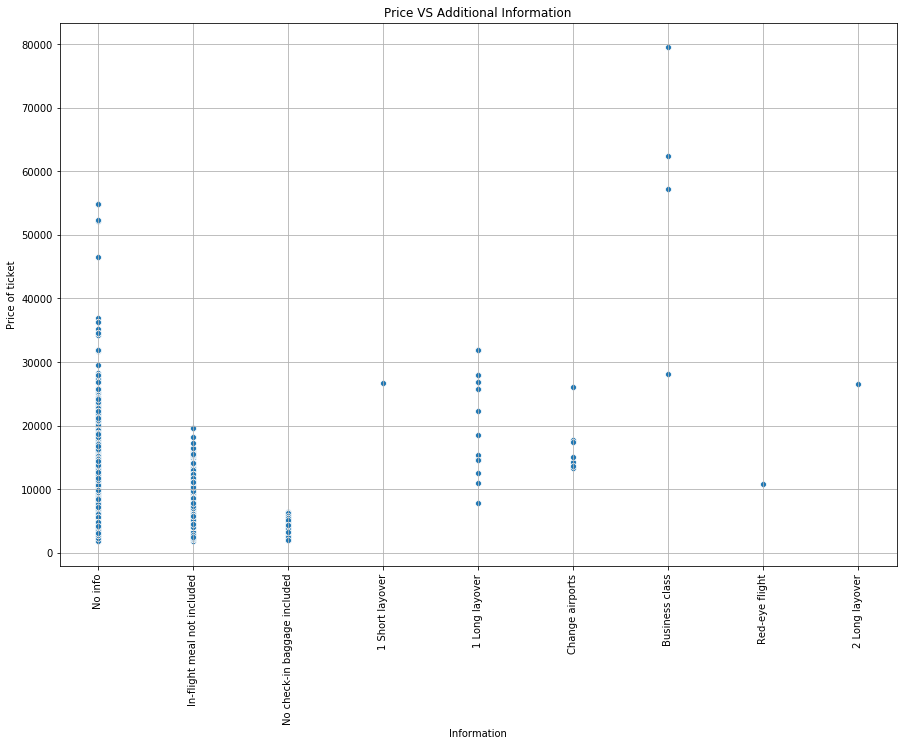

In [66]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Additional Information')
sns.scatterplot(df_flight['Additional_Info'], df_flight['Price'],data=df_flight)
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')
plt.grid(True)

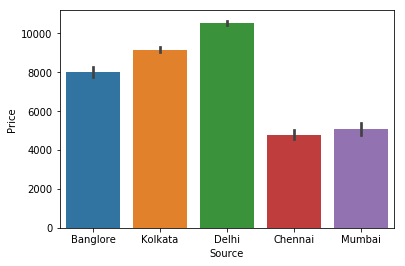

In [67]:
#Lets chcek from which region averge price of the flight was more
sns.barplot(x="Source",y="Price",data=df_flight)
plt.show()

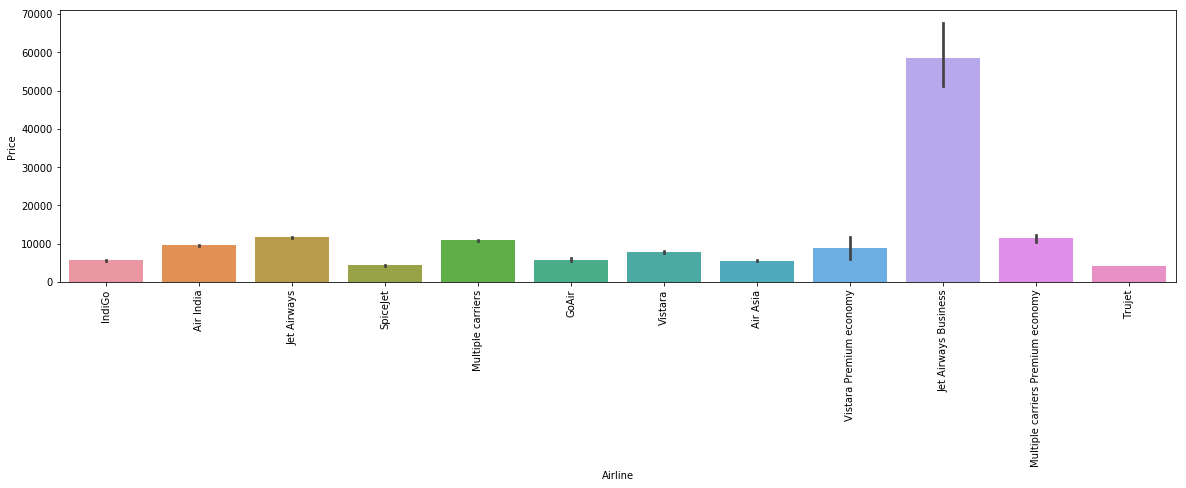

In [68]:
#lets check which airline is expensive based on average price
plt.figure(figsize=(20,5))
sns.barplot(x="Airline",y="Price",data=df_flight)
plt.xticks(rotation = 90)
plt.show()

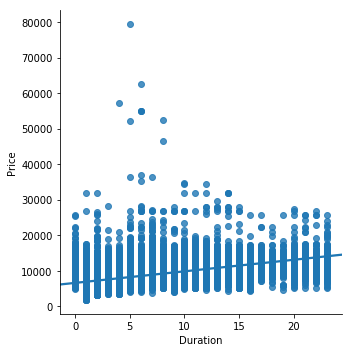

In [69]:
#lets draw a line plot between duration and price
sns.lmplot(x="Duration",y="Price",data=df_flight)
plt.show()
#this picture does not give clear idea about the correlation

In [70]:
#lets chcek the correlation matrix
df_flight.corr()
#so there positive correlation of 0.45 between price and duration

,Duration,Price
Duration,1.000000,0.453153
Price,0.453153,1.000000


In [71]:
#Some of the columns we can drop
df_flight.drop(columns=["Date_of_Journey","Route","Arrival_Time","Dep_Time"],inplace=True)

In [72]:
df_flight

,Additional_Info,Airline,Destination,Duration,Price,Source,Total_Stops,dataset,time_of_day
0,No info,IndiGo,New Delhi,2,3897.0,Banglore,non-stop,train,Night
1,No info,Air India,Banglore,7,7662.0,Kolkata,2 stops,train,Early Morning
2,No info,Jet Airways,Cochin,19,13882.0,Delhi,2 stops,train,Morning
3,No info,IndiGo,Banglore,5,6218.0,Kolkata,1 stop,train,Evening
4,No info,IndiGo,New Delhi,4,13302.0,Banglore,1 stop,train,Afternoon
5,No info,SpiceJet,Banglore,2,3873.0,Kolkata,non-stop,train,Morning
6,In-flight meal not included,Jet Airways,New Delhi,15,11087.0,Banglore,1 stop,train,Evening
7,No info,Jet Airways,New Delhi,21,22270.0,Banglore,1 stop,train,Morning
8,In-flight meal not included,Jet Airways,New Delhi,1,11087.0,Banglore,1 stop,train,Morning
9,No info,Multiple carriers,Cochin,7,8625.0,Delhi,1 stop,train,Morning


In [73]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 9 columns):
Additional_Info    13354 non-null object
Airline            13354 non-null object
Destination        13354 non-null object
Duration           13354 non-null int64
Price              10683 non-null float64
Source             13354 non-null object
Total_Stops        13353 non-null object
dataset            13354 non-null object
time_of_day        13354 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 939.0+ KB


In [74]:
#lets use one hot encodig to covert object datatypes to integers
df_flight_final=pd.get_dummies(df_flight,columns=["Additional_Info","Airline","Destination","Source","Total_Stops","time_of_day"],drop_first=True)

In [75]:
#Lets chcek display the data genrated after one hot encoding
df_flight_final

,Duration,Price,dataset,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,...,Source_Mumbai,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,time_of_day_Early Morning,time_of_day_Evening,time_of_day_Late Night,time_of_day_Morning,time_of_day_Night
0,2,3897.0,train,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,7,7662.0,train,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,19,13882.0,train,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,5,6218.0,train,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,4,13302.0,train,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,2,3873.0,train,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
6,15,11087.0,train,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,21,22270.0,train,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8,1,11087.0,train,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,7,8625.0,train,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [76]:
#Lets seprate the train and test from df_flight_final
df_train=df_flight_final.loc[df_flight_final["dataset"]=="train"]
df_test=df_flight_final.loc[df_flight_final["dataset"]=="test"]

In [77]:
df_train

,Duration,Price,dataset,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,...,Source_Mumbai,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,time_of_day_Early Morning,time_of_day_Evening,time_of_day_Late Night,time_of_day_Morning,time_of_day_Night
0,2,3897.0,train,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,7,7662.0,train,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,19,13882.0,train,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,5,6218.0,train,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,4,13302.0,train,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,2,3873.0,train,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
6,15,11087.0,train,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,21,22270.0,train,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8,1,11087.0,train,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,7,8625.0,train,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [78]:
df_test

,Duration,Price,dataset,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,...,Source_Mumbai,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,time_of_day_Early Morning,time_of_day_Evening,time_of_day_Late Night,time_of_day_Morning,time_of_day_Night
10683,10,NaN,test,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
10684,4,NaN,test,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
10685,23,NaN,test,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
10686,13,NaN,test,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10687,2,NaN,test,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
10688,18,NaN,test,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
10689,15,NaN,test,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
10690,5,NaN,test,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10691,2,NaN,test,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
10692,6,NaN,test,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [79]:
#re indexing the test dataset
df_test.reset_index(drop=True,inplace=True)

In [80]:
#Lets drop "Price" and "dataset" columns from the test dataset
#Also droping "dataset" columns from the train dataset
df_test.drop(columns=["Price","dataset"],inplace=True)
df_train.drop(columns=["dataset"],inplace=True)

In [81]:
#lets divide the df_train into iput an doutput
df_x=df_train.drop(columns=["Price"])
y=df_train[["Price"]]

In [82]:
#Lets bring every column to common scale
sc = StandardScaler()
x = sc.fit_transform(df_x)

In [84]:
#Lets use PCA for dimensionality reduction
pca = PCA(n_components=29)
x_pca=pca.fit_transform(x)
print("vraiance :{}".format(np.sum(pca.explained_variance_ratio_)))

vraiance :0.97724774474


In [85]:
#to find random stat which gives maximum r2_score
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [86]:
#lets make a function which evaluates the model using cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [87]:
#apply decision tree
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,x_pca,y)

('r2 score corresponding to ', 42, ' is ', 0.6479295431956498)
('r2 score corresponding to ', 43, ' is ', 0.7413352910161255)
('r2 score corresponding to ', 44, ' is ', 0.6659730032674409)
('r2 score corresponding to ', 45, ' is ', 0.6614234434599041)
('r2 score corresponding to ', 46, ' is ', 0.6476154149947526)
('r2 score corresponding to ', 47, ' is ', 0.6906862004845697)
('r2 score corresponding to ', 48, ' is ', 0.6451147163358069)
('r2 score corresponding to ', 49, ' is ', 0.6632880005684674)
('r2 score corresponding to ', 50, ' is ', 0.6617588765241937)
('r2 score corresponding to ', 51, ' is ', 0.7338281304848386)
('r2 score corresponding to ', 52, ' is ', 0.6889418709845818)
('r2 score corresponding to ', 53, ' is ', 0.6469349579794879)
('r2 score corresponding to ', 54, ' is ', 0.6183646290072595)
('r2 score corresponding to ', 55, ' is ', 0.6963508931188467)
('r2 score corresponding to ', 56, ' is ', 0.6817793170626806)
('r2 score corresponding to ', 57, ' is ', 0.7224581191

In [88]:
#Lets chcek the cross_val_score for decision trees
print("Decision Tree Regressor\n\n")
model_evaluation(dtr,x_pca,y)

Decision Tree Regressor


('Mean r2 score for regressor: ', 0.6826378519930649)
('standard deviation in r2 score for regressor: ', 0.016660955619258094)
[0.65699032 0.69942592 0.69719478 0.69028119 0.66929705]


In [89]:
#Lets chcek random forest
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

{'n_estimators': 500}

In [90]:
#lets chcek Random forest using n_estimators=500 
rfr=RandomForestRegressor(n_estimators=500)
#Lets chcek the cross_val_score for Random Forest Regressor
print("Random Forest Regressor\n\n")
model_evaluation(rfr,x_pca,y)

Random Forest Regressor


('Mean r2 score for regressor: ', 0.7168801773017227)
('standard deviation in r2 score for regressor: ', 0.008450492067105008)
[0.70126883 0.720909   0.71632375 0.7263498  0.71954951]


In [91]:
#Lets chcek KNN regressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x_pca, y)
clf.best_params_

{'n_neighbors': 6}

In [92]:
knr=KNeighborsRegressor(n_neighbors=6)
maxr2_score(knr,x_pca,y)

('r2 score corresponding to ', 42, ' is ', 0.7034733092754168)
('r2 score corresponding to ', 43, ' is ', 0.7164313656576539)
('r2 score corresponding to ', 44, ' is ', 0.7037122664363755)
('r2 score corresponding to ', 45, ' is ', 0.6695579152588296)
('r2 score corresponding to ', 46, ' is ', 0.7004349727204444)
('r2 score corresponding to ', 47, ' is ', 0.6847834720786965)
('r2 score corresponding to ', 48, ' is ', 0.68924751024162)
('r2 score corresponding to ', 49, ' is ', 0.6805439430335698)
('r2 score corresponding to ', 50, ' is ', 0.6667137064748164)
('r2 score corresponding to ', 51, ' is ', 0.7177611906143366)
('r2 score corresponding to ', 52, ' is ', 0.7015281595612561)
('r2 score corresponding to ', 53, ' is ', 0.6896495076079163)
('r2 score corresponding to ', 54, ' is ', 0.702150094054621)
('r2 score corresponding to ', 55, ' is ', 0.6693998105967179)
('r2 score corresponding to ', 56, ' is ', 0.6945598466449199)
('r2 score corresponding to ', 57, ' is ', 0.6600635166851

77

In [93]:
#Lets check the cross_val score of KKN regressor
print("KNN Regressor\n\n")
model_evaluation(knr,x_pca,y)

KNN Regressor


('Mean r2 score for regressor: ', 0.6991591651624771)
('standard deviation in r2 score for regressor: ', 0.016242270814686016)
[0.6678724  0.70803262 0.70746119 0.71303276 0.69939685]


In [94]:
#lets chcek the SVM
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [95]:
svr=SVR(C=10,kernel="linear")
maxr2_score(svr,x_pca,y)

('r2 score corresponding to ', 42, ' is ', 0.45885550314038603)
('r2 score corresponding to ', 43, ' is ', 0.5251092203212143)
('r2 score corresponding to ', 44, ' is ', 0.6010143403437087)
('r2 score corresponding to ', 45, ' is ', 0.5637699289261322)
('r2 score corresponding to ', 46, ' is ', 0.6022352867134502)
('r2 score corresponding to ', 47, ' is ', 0.5748093650721284)
('r2 score corresponding to ', 48, ' is ', 0.5444892362650054)
('r2 score corresponding to ', 49, ' is ', 0.6076336243685602)
('r2 score corresponding to ', 50, ' is ', 0.572237716236931)
('r2 score corresponding to ', 51, ' is ', 0.5264890371837959)
('r2 score corresponding to ', 52, ' is ', 0.48285523578131573)
('r2 score corresponding to ', 53, ' is ', 0.6114517452084745)
('r2 score corresponding to ', 54, ' is ', 0.4825391270680558)
('r2 score corresponding to ', 55, ' is ', 0.44788002376521774)
('r2 score corresponding to ', 56, ' is ', 0.5422818423588099)
('r2 score corresponding to ', 57, ' is ', 0.42850852

77

In [96]:
#random forest and KNN are peforming almost equally good,but KNN is faster so we will choose KNN as our Final model
#knr is model
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 77,test_size=0.20)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)

In [97]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

('RMSE is: ', 2230.5734477774795)
('r2_score is: ', 0.7406673174229697)


In [98]:
#lets transform df_test accoring to pca
x_pca_test=pca.transform(df_test)

In [99]:
price_pred=knr.predict(x_pca_test)

In [100]:
#lets make the dataframe for price_pred
price_pred=pd.DataFrame(price_pred,columns=["Price"])

In [101]:
#Lets save the submission to csv
price_pred.to_csv("Flight_Price_Prediction_Results.csv",index=False)

In [102]:
# save the model
import pickle
filename = 'Flight_Price_Prediction.pkl'
pickle.dump(knr, open(filename, 'wb'))

***